## **Importing dataset**

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk
import seaborn as sns
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\noelm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
df = pd.read_csv('Combined_News_DJIA.csv')
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

## **Preprocessing**

In [18]:
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [19]:
df["CombNews"] = df[['Top1', 'Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13','Top14','Top15','Top16','Top17','Top18','Top19','Top20','Top21','Top22']].agg(' '.join, axis=1)
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,CombNews
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""Georgia 'downs two Russian warplanes' as cou..."
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'Why wont America and Nato help us? If they w...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",b'Remember that adorable 9-year-old who sang a...


In [20]:
df["CombNews"].values[0]


'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [21]:
for i, row in df.iterrows():
    df["CombNews"].values[i] = df["CombNews"].values[i].replace('\' ',' ')
    df["CombNews"].values[i] = df["CombNews"].values[i].replace('b\'','')
    df["CombNews"].values[i] = df["CombNews"].values[i].replace('"','')

print(df["CombNews"].values[2])


Remember that adorable 9-year-old who sang at the opening ceremonies? That was fake, too. bRussia 'ends Georgia operation' If we had no sexual harassment we would have no children... bAl-Qa'eda is losing support in Iraq because of a brutal crackdown on activities it regards as un-Islamic - including women buying cucumbers Ceasefire in Georgia: Putin Outmaneuvers the West Why Microsoft and Intel tried to kill the XO $100 laptop Stratfor: The Russo-Georgian War and the Balance of Power    bI'm Trying to Get a Sense of This Whole Georgia-Russia War: Vote Up If You Think Georgia Started It, Or Down If you Think Russia Did bThe US military was surprised by the timing and swiftness of the Russian military's move into South Ossetia and is still trying to sort out what happened, a US defense official said Monday U.S. Beats War Drum as Iran Dumps the Dollar Gorbachev: Georgian military attacked the South Ossetian capital of Tskhinvali with multiple rocket launchers designed to devastate large a

In [22]:
#Sentiment Analysis using NLTK

sia = SentimentIntensityAnalyzer()

res = {}
for i, row in tqdm(df.iterrows()):
    news = row['CombNews']
    res[i] = sia.polarity_scores(news)

0it [00:00, ?it/s]

### **Sentiment Analysis**

In [23]:
df_new = pd.DataFrame(res).T
df_new

,neg,neu,pos,compound
0,0.222,0.732,0.046,-0.9972
1,0.188,0.712,0.100,-0.9771
2,0.202,0.735,0.063,-0.9948
3,0.136,0.789,0.075,-0.9619
4,0.202,0.724,0.074,-0.9906
...,...,...,...,...
1984,0.166,0.745,0.089,-0.9786
1985,0.110,0.790,0.100,-0.6549
1986,0.249,0.672,0.079,-0.9979
1987,0.191,0.736,0.073,-0.9954


In [24]:
df = pd.concat([df, df_new], axis=1, join="outer")
df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top21,Top22,Top23,Top24,Top25,CombNews,neg,neu,pos,compound
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",bGeorgia 'downs two Russian warplanes as count...,0.222,0.732,0.046,-0.9972
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...,0.188,0.712,0.100,-0.9771
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...,0.202,0.735,0.063,-0.9948
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,b U.S. refuses Israel weapons to attack Iran: ...,0.136,0.789,0.075,-0.9619
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Saudi Arabia: Mother moves to block child ma...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,All the experts admit that we should legalise ...,0.202,0.724,0.074,-0.9906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by

In [25]:
df = df.drop(['Top1', 'Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13','Top14','Top15','Top16','Top17','Top18','Top19','Top20','Top21','Top22', 'Top23', 'Top24', 'Top25'], axis=1)
df.head(3)

,Date,Label,CombNews,neg,neu,pos,compound
0,2008-08-08,0,bGeorgia 'downs two Russian warplanes as count...,0.222,0.732,0.046,-0.9972
1,2008-08-11,1,Why wont America and Nato help us? If they won...,0.188,0.712,0.100,-0.9771
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,0.202,0.735,0.063,-0.9948


In [26]:
def label_comp(compound):
    if compound >= 0:
        return '1'
    else:
        return '0'

df['Label'] = df['compound'].apply(label_comp)
df.sample(3)

,Date,Label,CombNews,neg,neu,pos,compound
1719,2015-06-09,0,British 'world-record sniper says he can still...,0.159,0.766,0.076,-0.9929
1031,2012-09-11,0,\n\nSouth Korea rejects creationist interferen...,0.138,0.776,0.086,-0.9715
930,2012-04-18,0,Picture of Afghan Girl screaming after suicide...,0.179,0.747,0.074,-0.9889


# EDA

In [35]:
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
import string


filtered_words = [
    word for word in ' '.join(df['CombNews'])
    .replace("'", "")  # Remove single quotes
    .translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    .split()
    if word.lower() not in stop_words
]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\noelm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


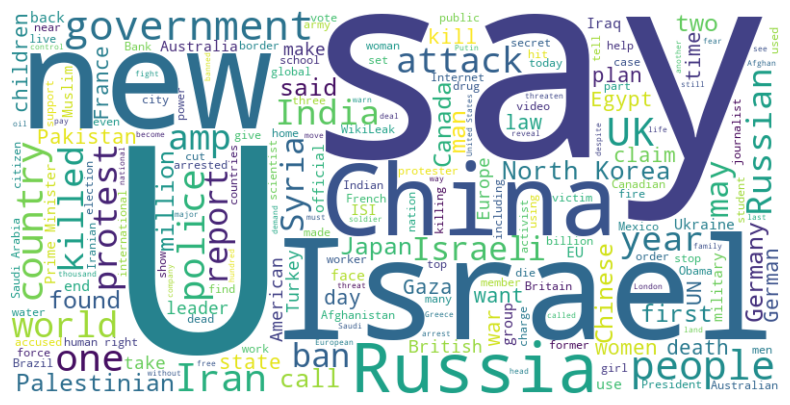

In [37]:
from wordcloud import WordCloud

# Combine all news text into a single string
text = " ".join(filtered_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axis for the word cloud
plt.show()

C:\Users\noelm\AppData\Local\Temp\ipykernel_6196\388518508.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_freq_df, x='Word', y='Frequency', palette='plasma')


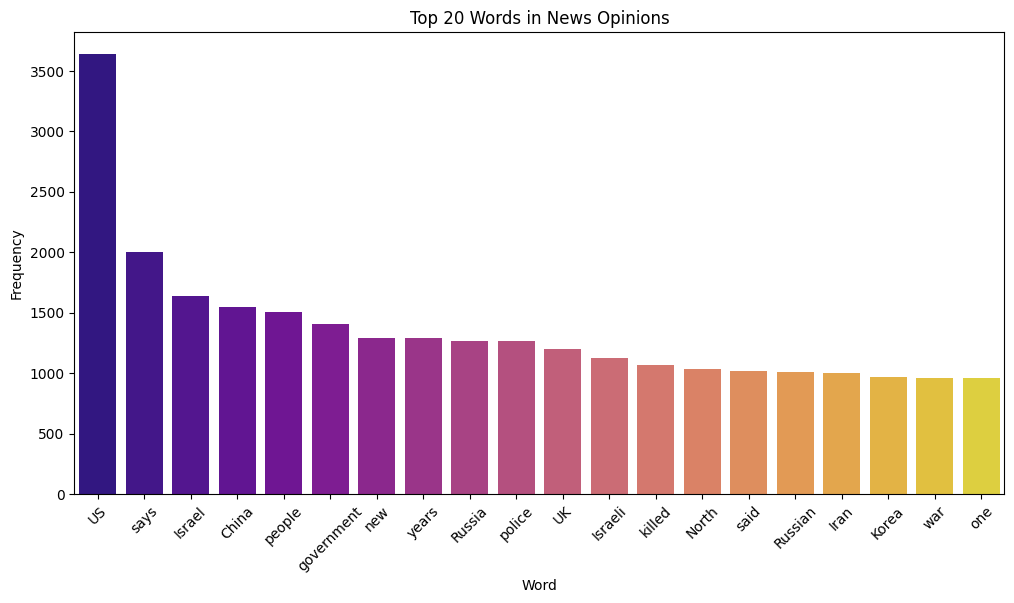

In [38]:
# Calculate word frequencies
word_freq = Counter(filtered_words)
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=word_freq_df, x='Word', y='Frequency', palette='plasma')
plt.title('Top 20 Words in News Opinions')
plt.xticks(rotation=45)
plt.show()


## **Tokenization**

In [12]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define a function to preprocess and tokenize the text data
def preprocess_text(text):
    return tokenizer(text, padding='max_length', truncation=True, max_length=512, return_tensors='pt')


df['input_ids'] = df['CombNews'].apply(lambda x: preprocess_text(x)['input_ids'].squeeze())
df['attention_mask'] = df['CombNews'].apply(lambda x: preprocess_text(x)['attention_mask'].squeeze())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [13]:
print(df['Label'].dtype)
print(df['Label'].unique())


object
['0' '1']


## **Training the Model**

In [14]:
import torch
from torch.utils.data import Dataset

# Ensure labels are properly converted
df['Label'] = df['Label'].astype(int)  # Convert string labels to integers

class InvestmentDataset(Dataset):
    def __init__(self, df):
        # Ensure input data are tensors
        self.input_ids = torch.stack(list(df['input_ids']))
        self.attention_mask = torch.stack(list(df['attention_mask']))
        # Convert labels to tensor with the correct data type
        self.labels = torch.tensor(df['Label'].values, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'labels': self.labels[idx]
        }

# Create the dataset
dataset = InvestmentDataset(df)


In [15]:
from torch.utils.data import DataLoader

batch_size = 8
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [16]:
from transformers import BertForSequenceClassification, BertTokenizer

# Load a pretrained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
import torch
from transformers import AdamW
from tqdm import tqdm

# Check if a GPU is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the model to the GPU
model.to(device)

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=5e-5)  # Learning rate can be adjusted
loss_fn = torch.nn.CrossEntropyLoss()

# Training loop
num_epochs = 3

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0

    for batch in tqdm(train_loader):
        # Move the batch data to the GPU
        input_ids = batch['input_ids'].squeeze(1).to(device)  # Remove extra dimension and move to device
        attention_mask = batch['attention_mask'].squeeze(1).to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}')


100%|██████████| 249/249 [03:05<00:00,  1.34it/s]


Epoch 1/3, Loss: 0.0881


100%|██████████| 249/249 [03:08<00:00,  1.32it/s]


Epoch 2/3, Loss: 0.0828


100%|██████████| 249/249 [03:08<00:00,  1.32it/s]

Epoch 3/3, Loss: 0.0855


## **Accuracy Evaluation**

In [26]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

# Assuming df is your DataFrame with all the data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)  # 20% for testing


# Create a test dataset
test_dataset = InvestmentDataset(test_df)

# Create a DataLoader for the test dataset
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [27]:
import torch

# Set the model to evaluation mode
model.eval()


correct_predictions = 0
total_predictions = 0

# Disable gradient calculations for evaluation
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].squeeze(1).to(device)
        attention_mask = batch['attention_mask'].squeeze(1).to(device)
        labels = batch['labels'].to(device)

        # Forward pass to get logits
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Get the predicted labels
        _, predicted_labels = torch.max(logits, dim=1)

        # Count the number of correct predictions
        correct_predictions += (predicted_labels == labels).sum().item()
        total_predictions += labels.size(0)

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print(f'Test Accuracy: {accuracy:.4f}')


Test Accuracy: 0.9874


## **Asking the Model for suggestions**

In [21]:
def ask_model(question):

    inputs = tokenizer(question, padding='max_length', truncation=True, max_length=512, return_tensors='pt')

    # Move the inputs to the appropriate device
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    # Put the model in evaluation mode and disable gradients
    model.eval()
    with torch.no_grad():
        # Get the logits from the model
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Get the predicted label (e.g., 0 or 1)
        predicted_label = torch.argmax(logits, dim=1).item()

    # Convert the label to a meaningful output (e.g., "good" or "bad")
    if predicted_label == 1:
        return "Good time to invest"
    else:
        return "Bad time to invest"

# Example question
question = "Is now a good time to invest in technology stocks?"
answer = ask_model(question)
print(f"Question: {question}")
print(f"Model's Prediction: {answer}")


Question: Is now a good time to invest in technology stocks?
Model's Prediction: Bad time to invest


In [22]:
question = "Is now a good time to invest in Automobile stocks?"
answer = ask_model(question)
print(f"Question: {question}")
print(f"Model's Prediction: {answer}")

Question: Is now a good time to invest in Automobile stocks?
Model's Prediction: Bad time to invest


In [24]:
question = "Is it a good time to invest in Nifty stocks given the recent market uptrend?"
answer = ask_model(question)
print(f"Question: {question}")
print(f"Model's Prediction: {answer}")


Question: Is it a good time to invest in Nifty stocks given the recent market uptrend?
Model's Prediction: Bad time to invest
